<a href="https://colab.research.google.com/github/RISHIKA-hub-929/CODSOFT-5/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/creditcard.csv")

# Display basic info
print(df.info())

# Check first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5848 non-null   int64  
 1   V1      5848 non-null   float64
 2   V2      5848 non-null   float64
 3   V3      5848 non-null   float64
 4   V4      5848 non-null   float64
 5   V5      5848 non-null   float64
 6   V6      5848 non-null   float64
 7   V7      5848 non-null   float64
 8   V8      5848 non-null   float64
 9   V9      5848 non-null   float64
 10  V10     5848 non-null   float64
 11  V11     5848 non-null   float64
 12  V12     5848 non-null   float64
 13  V13     5848 non-null   float64
 14  V14     5848 non-null   float64
 15  V15     5848 non-null   float64
 16  V16     5848 non-null   float64
 17  V17     5848 non-null   float64
 18  V18     5848 non-null   float64
 19  V19     5848 non-null   float64
 20  V20     5848 non-null   float64
 21  V21     5848 non-null   float64
 22  

In [ ]:
# Check for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


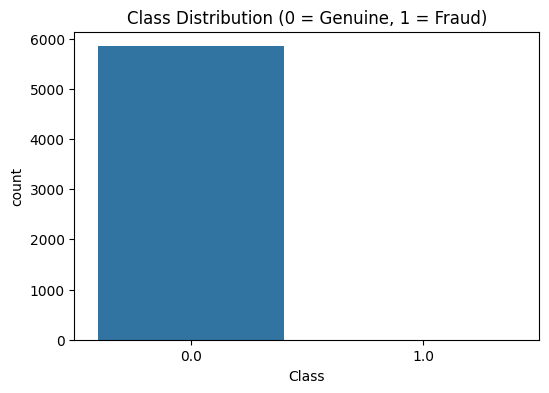

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of fraud vs genuine transactions
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to the 'Amount' column
df['Normalized_Amount'] = StandardScaler().fit_transform(df[['Amount']])

# Drop the original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)

print(df.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  Normalized_Amount 

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Class', axis=1)  # All columns except 'Class'
y = df['Class']  # Target column

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (4678, 29)
Testing set shape: (1170, 29)


In [ ]:
# Check dataset columns
print(df.columns)  # Ensure 'Amount' exists

# Normalize the Amount column if it exists
if 'Amount' in df.columns:
    scaler = StandardScaler()
    df['Amount'] = scaler.fit_transform(df[['Amount']])
else:
    print("Column 'Amount' not found. Skipping normalization.")

# Proceed with training


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Normalized_Amount'],
      dtype='object')
Column 'Amount' not found. Skipping normalization.


In [ ]:
# Use Normalized_Amount instead of Amount
if 'Normalized_Amount' in df.columns:
    X['Normalized_Amount'] = df['Normalized_Amount']
else:
    print("Column 'Normalized_Amount' not found. Skipping normalization.")


In [ ]:
print(df.columns)  # Check if 'Class' is present
print("Unique values in Class column:", df['Class'].unique())  # Should be 0 and 1


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Normalized_Amount'],
      dtype='object')
Unique values in Class column: [ 0.  1. nan]


In [ ]:
print("Columns in dataset:", df.columns)  # Ensure 'Class' is present
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Unique values in Class column:", y_train.unique())  # Should be 0 and 1


Columns in dataset: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Normalized_Amount'],
      dtype='object')
X_train shape: (4678, 29)
y_train shape: (4678,)
Unique values in Class column: [ 0. nan  1.]


In [ ]:
# Drop rows where 'Class' is NaN
X_train = X_train[y_train.notna()]
y_train = y_train.dropna()

# Convert 'Class' to integers (ensure it's properly formatted)
y_train = y_train.astype(int)

print("Fixed y_train:")
print(y_train.unique())  # Should now only contain [0, 1]



Fixed y_train:
[0 1]


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling instead of SMOTE
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("Oversampling Applied Successfully!")
print("New class distribution:\n", y_train_resampled.value_counts())


Oversampling Applied Successfully!
New class distribution:
 Class
0    4674
1    4674
Name: count, dtype: int64


In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9974358974358974
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1170
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       1.00      1.00      1.00      1170



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

In [ ]:
import numpy as np

feature_importance = np.abs(model.coef_).flatten()
feature_names = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
for i in sorted_indices[:10]:  # Top 10 features
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")


V14: 2.0166
V12: 1.8382
V23: 1.6648
V10: 1.5618
V15: 1.5241
V20: 1.4197
V1: 1.1507
V17: 1.0047
V4: 0.9800
V3: 0.9714


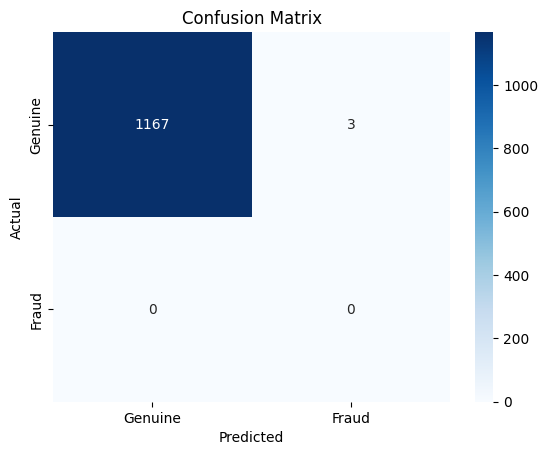

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest F1 Score:", f1_score(y_test, rf_pred))


Random Forest Accuracy: 1.0
Random Forest F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


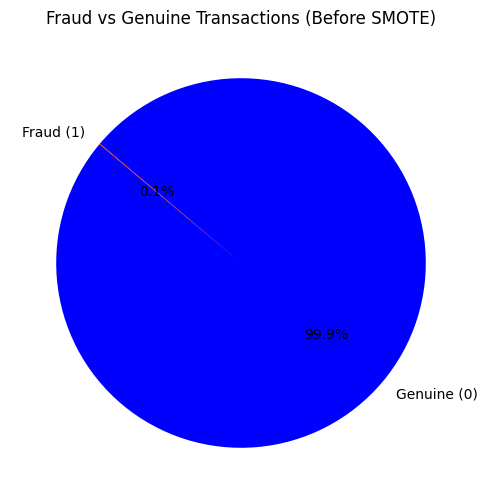

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = y_train.value_counts()

# Labels for the classes
labels = ["Genuine (0)", "Fraud (1)"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=["blue", "red"], startangle=140)
plt.title("Fraud vs Genuine Transactions (Before SMOTE)")
plt.show()
